In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
from nltk.tokenize import word_tokenize


In [2]:
stop_words.extend([',', '.', '', '.', ';', "'", ':', '(', 'say', ')', '?', "'s"])
puncts = [',', '.', '', '.', ';', "'", ':', '(', ')', '?', "'s"]

In [3]:
def count_words(sentence):
    test_tokens = word_tokenize(sentence)
    filtered_tokens = [w for w in test_tokens if not w.lower() in puncts]
    return len(filtered_tokens)

In [4]:
data = pd.read_csv("/Users/NickBarx/Documents/Education/Columbia/Courses/Applied_Data_Science/PS_1/philosophy_data.csv")

In [5]:
data.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [6]:
data['word_count'] = data.apply(lambda row : count_words( row["sentence_lowered"] ), axis = 1 )

In [7]:
text = data["lemmatized_str"].to_list()

In [8]:
total_text = []
for t in text:
    total_text.extend(t.split(" "))

When thinking about creating a data story of philosophical texts, its important first to ask ourselves, what would be interesting to see. Considering what philosphers focus on, such as questions about humanity and other abstract topics, one of the first things we can look at to better understand our data, is the type of questions philosphers asked in our text.   

In [9]:
result = []
qs = ['who', 'what', 'where', 'when', 'why']
for word in qs:
    result.append(total_text.count(word))


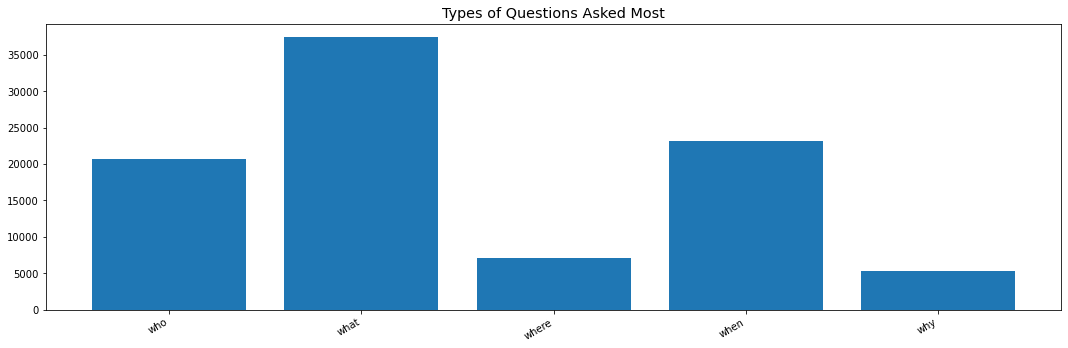

In [10]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.bar( qs, result )
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.rcParams.update({'font.size': 12})
plt.title('Types of Questions Asked Most')

fig.tight_layout()
plt.show()

The above chart helps highlight that the types of questions the philosophers asked were "what"-type of questions rather than "who" or "when" questions. This could be indicative of the fact that these questions are less related to time (i.e. "when") or specific people (i.e. "who"), but rather about current topics (i.e. "what"). 

Interestingly, the least common question are "why"-based questions that we could think would be more the type of questions philosophers would be asking. 

In [11]:
filtered_sentence = [w for w in total_text if not w.lower() in stop_words]


In [12]:
freq = Counter(filtered_sentence).most_common(50)
freq_df = pd.DataFrame(freq, columns = ["Word", "Frequency"])

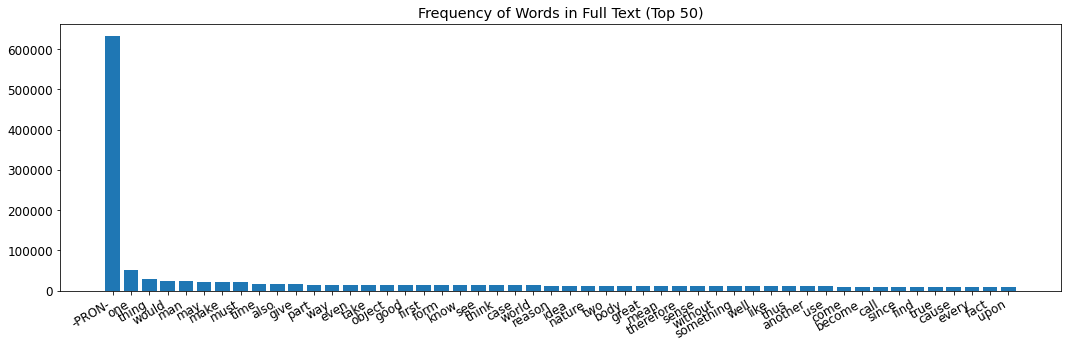

In [13]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.bar( freq_df["Word"], freq_df["Frequency"] )
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.rcParams.update({'font.size': 12})
plt.title('Frequency of Words in Full Text (Top 50)')

fig.tight_layout()
plt.show()

In the same way that understanding the type of questions that are being asked, understanding the types of words used in the text can also highlight interesting insights. The chart above shows the significant skewness towards the use of pronoun types of words, which would be in line with expectations. While we would expect one of more frequently used words be related to the person, one thing we would need to take into account is that the pronoun item is based on a grouping of several words while all of the other top items are individual words. 

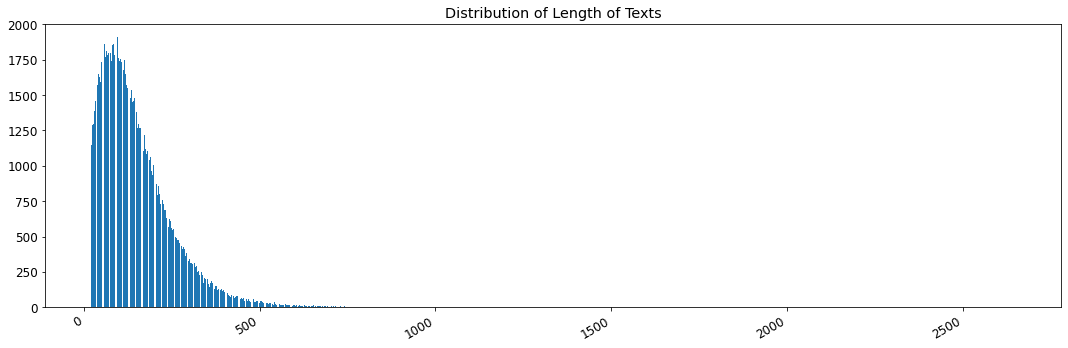

In [16]:
date = data.groupby(["sentence_length"]).count()
date = date.sort_values(by='author', ascending=True)
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.bar( date.index, date["title"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.rcParams.update({'font.size': 12})
plt.title('Distribution of Length of Texts')

fig.tight_layout()
plt.show()

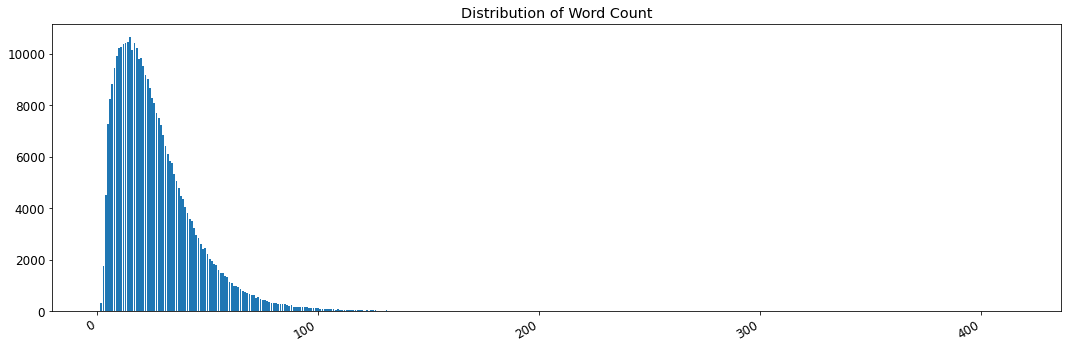

In [18]:
date = data.groupby(["word_count"]).count()
date = date.sort_values(by='author', ascending=True)
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.bar( date.index, date["title"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.rcParams.update({'font.size': 12})
plt.title('Distribution of Word Count')

fig.tight_layout()
plt.show()

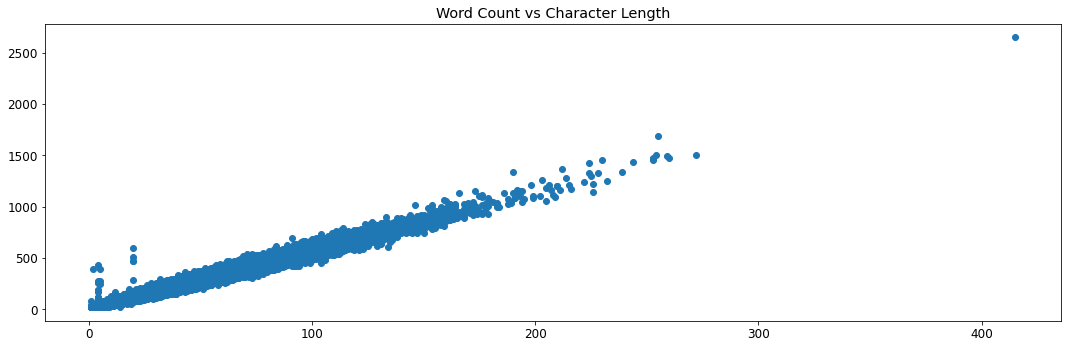

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.scatter( data["word_count"], data["sentence_length"])
plt.rcParams.update({'font.size': 12})
plt.title('Word Count vs Character Length')

fig.tight_layout()
plt.show()

Looking at word count vs character length can help identify texts that breakout of the standard relationship between the two dimensions that we would expect (character number to increase with word count). However, this chart helps highlight the handful of texts that differ greatly in the the ratio between character length and word count relative to other bodies of text. With word count being on the x axis and character number on the y length, the anomalies we are seeing in the bottom left can be representative of more complex language being used (longer words, but fewer number of words in total). 

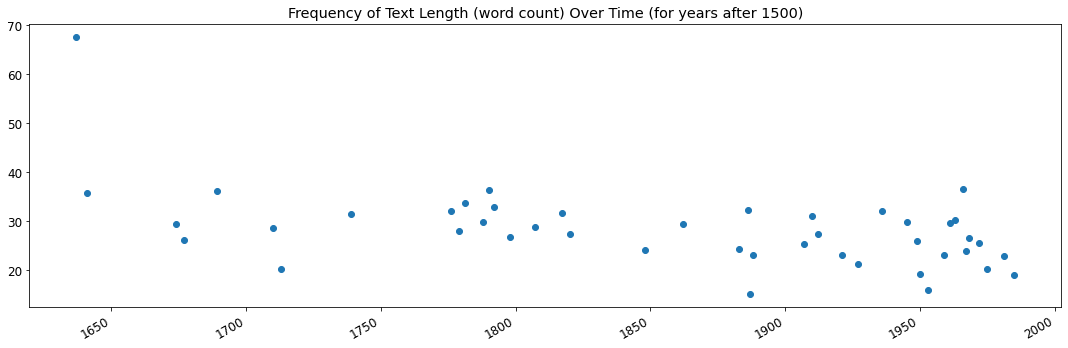

In [14]:
date = data.groupby(["original_publication_date"]).mean()
date = date[date.index>1500]
date = date.sort_values(by='word_count', ascending=True)
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.scatter( date.index, date["word_count"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.rcParams.update({'font.size': 12})
plt.title('Frequency of Text Length (word count) Over Time (for years after 1500)')

fig.tight_layout()
plt.show()

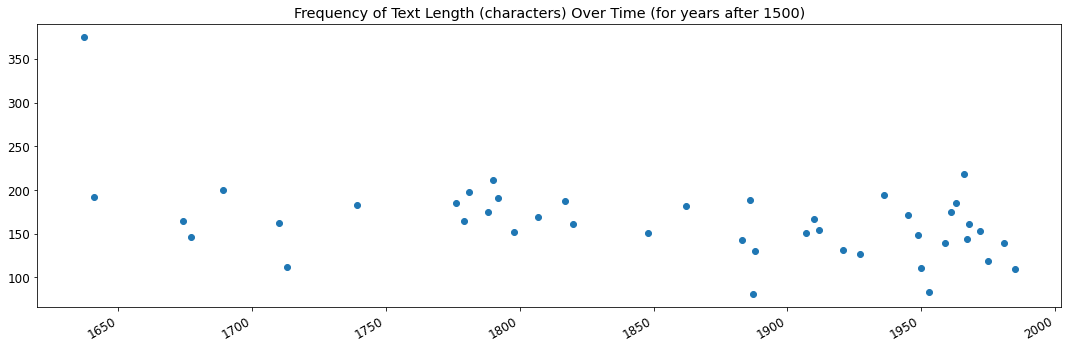

In [15]:
date = data.groupby(["original_publication_date"]).mean()
date = date[date.index>1500]
date = date.sort_values(by='sentence_length', ascending=True)
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.scatter( date.index, date["sentence_length"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.rcParams.update({'font.size': 12})
plt.title('Frequency of Text Length (characters) Over Time (for years after 1500)')

fig.tight_layout()
plt.show()

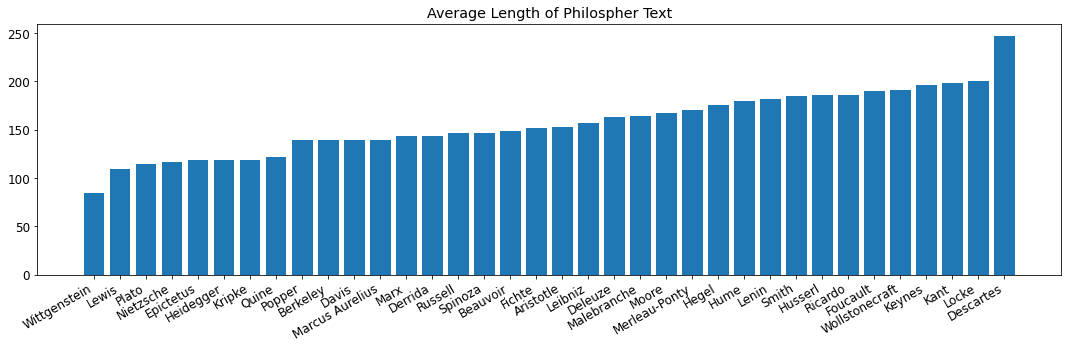

In [17]:
averages = data.groupby(["author"]).mean()
averages = averages.sort_values(by='sentence_length', ascending=True)
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.bar( averages.index, averages["sentence_length"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.rcParams.update({'font.size': 12})
plt.title('Average Length of Philospher Text')

fig.tight_layout()
plt.show()